In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')
import yfinance as yf

In [3]:
start = '2013-01-01'
end = '2023-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.head(6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,17.918339,18.107130,17.846855,18.013729,18.013729,102033017
2013-01-03,18.055573,18.229919,17.950716,18.024191,18.024191,93075567
2013-01-04,18.165413,18.467529,18.124067,18.380356,18.380356,110954331
2013-01-07,18.317591,18.415474,18.196297,18.300158,18.300158,66476239
2013-01-08,18.319834,18.338762,18.043119,18.264042,18.264042,67295297
2013-01-09,18.238388,18.389820,18.146980,18.384092,18.384092,81291563


In [5]:
data.shape

(2762, 6)

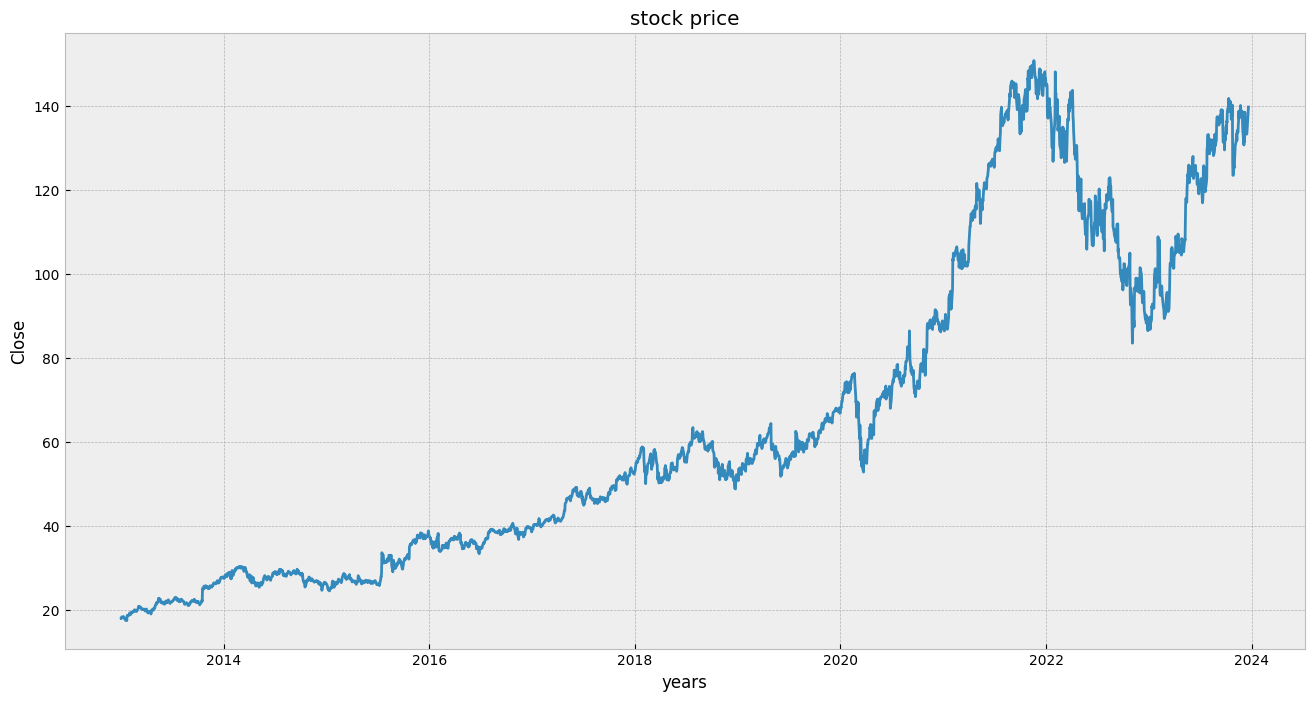

In [6]:
plt.figure(figsize=(16,8))
plt.title('stock price')
plt.xlabel('years')
plt.ylabel('Close')
plt.plot(data['Close'])
plt.show()

In [7]:
data = data[['Close']]
data.head(4)

,Close
Date,
2013-01-02,18.013729
2013-01-03,18.024191
2013-01-04,18.380356
2013-01-07,18.300158


In [8]:
# variable creation to predict x days out into the fututre
future_days = 25
data['Prediction'] = data[['Close']].shift(-future_days)
data.head(4)

C:\Users\Dell\AppData\Local\Temp\ipykernel_34940\3091093170.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Prediction'] = data[['Close']].shift(-future_days)


,Close,Prediction
Date,,
2013-01-02,18.013729,19.276497
2013-01-03,18.024191,19.560930
2013-01-04,18.380356,19.487455
2013-01-07,18.300158,19.444616


In [9]:
X = np.array(data.drop(['Prediction'], axis =1))[:-future_days]
print(X)

[[ 18.0137291 ]
 [ 18.0241909 ]
 [ 18.38035583]
 ...
 [134.05999756]
 [133.63999939]
 [135.42999268]]


In [10]:
y = np.array(data['Prediction'])[:-future_days]
print(y)

[ 19.27649689  19.56093025  19.48745537 ... 137.19000244 138.1000061
 139.66000366]


In [12]:
#split the data 75% tr and 25% te
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [13]:
tree= DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train,y_train)

In [14]:
#get the last rows of future dataset
x_future = data.drop(['Prediction'], axis = 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[141.69999695],
       [140.28999329],
       [138.58000183],
       [140.49000549],
       [140.99000549],
       [139.27999878],
       [138.97999573],
       [136.74000549],
       [137.8999939 ],
       [140.11999512],
       [126.66999817],
       [123.44000244],
       [123.40000153],
       [125.75      ],
       [125.30000305],
       [127.56999969],
       [128.58000183],
       [130.36999512],
       [131.44999695],
       [132.3999939 ],
       [133.25999451],
       [131.69000244],
       [134.05999756],
       [133.63999939],
       [135.42999268]])

In [16]:
# model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[136.38000488 138.69999695 136.80149841 137.91999817 138.61999512
 140.02000427 138.22000122 138.05000305 138.61999512 136.3999939
 133.91999817 133.32000732 130.63000488 132.38999939 131.42999268
 138.44999695 136.63999939 134.69999695 133.63999939 133.97000122
 133.19999695 133.30000305 137.19000244 138.1000061  139.66000366]

[142.39028941 140.98725059 139.2857058  141.18627482 141.68380502
 139.98224505 139.68372389 137.4547983  138.60905683 140.81809214
 127.43453272 124.22049186 124.18068854 126.51907897 126.07130483
 128.33008861 129.33510174 131.11625319 132.19092025 133.1362246
 133.99197715 132.42974021 134.78802851 134.37010497 136.15125641]


C:\Users\Dell\AppData\Local\Temp\ipykernel_34940\103306782.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']= predictions


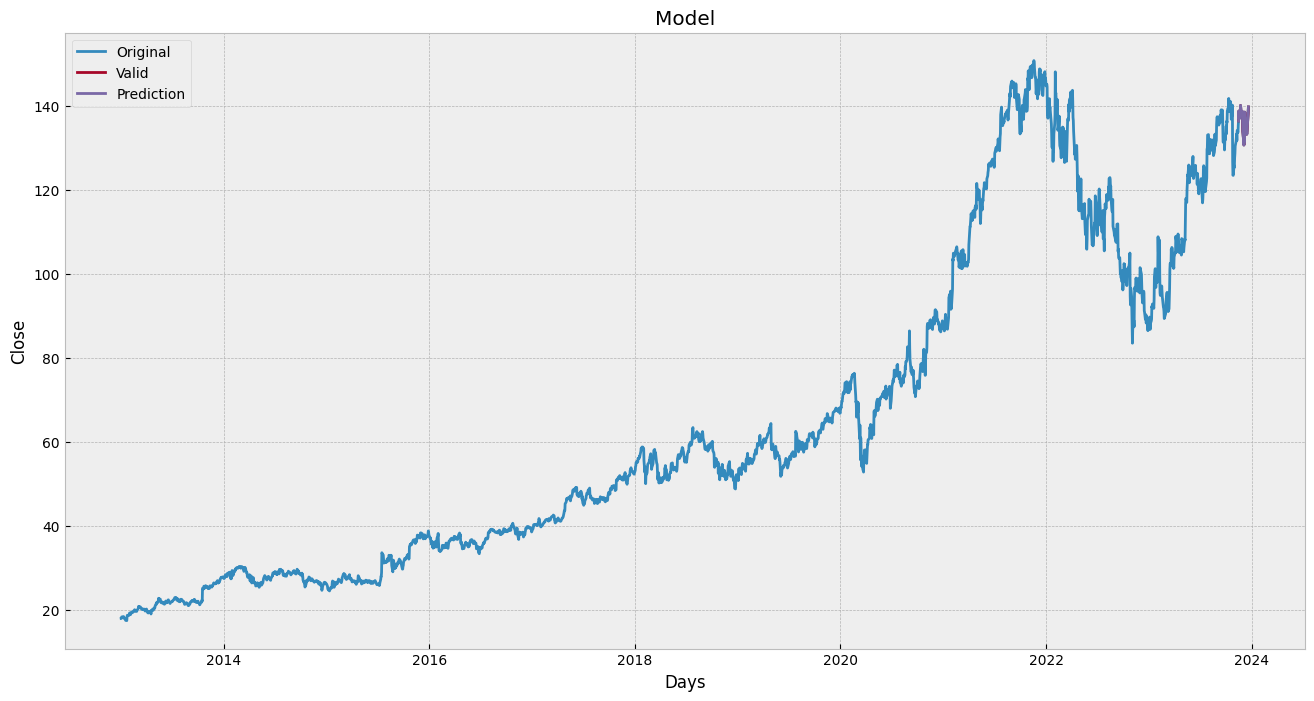

In [20]:
#visualize the data
predictions = tree_prediction

valid = data[X.shape[0]:]
valid['Predictions']= predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close')
plt.plot(data['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Valid', 'Prediction'])
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_34940\2020965474.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']= predictions


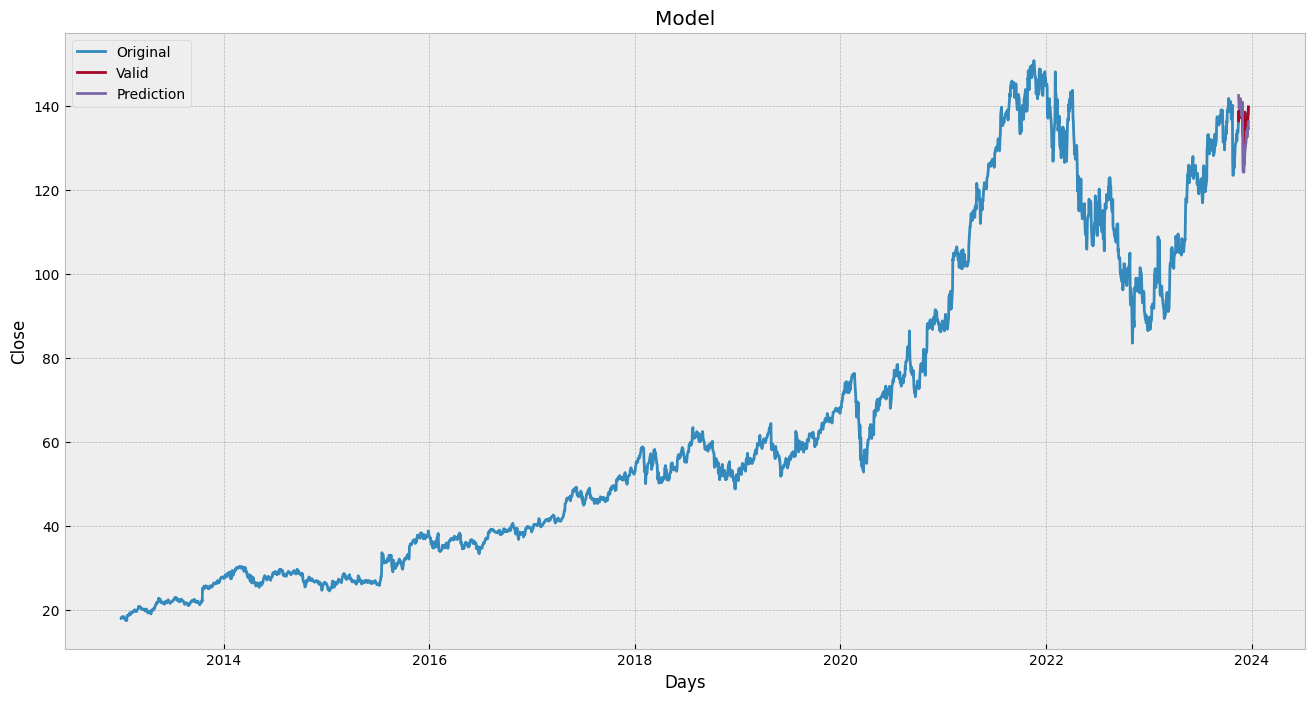

In [21]:
#visualize the data
predictions = lr_prediction

valid = data[X.shape[0]:]
valid['Predictions']= predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close')
plt.plot(data['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Valid', 'Prediction'])
plt.show()

In [22]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy * 100)
print("Precision:", precision * 100)
print("Recall:", recall * 100)
print("F1 Score:", f1 * 100)

Accuracy: 87.5
Precision: 92.70833333333334
Recall: 83.17757009345794
F1 Score: 87.68472906403942
